<h1>Weighted Least Squares</h1>

weighted linear regression uses an xtra weight term, which allows closer points to the training points to have some influence on the value of the point. The cost function slightly differs from linear regression. 

$J(\theta) = \sum_{i} \omega^{(i)} (y^{(j)} - \theta^Tx^{(i)})^2$

This is the cost for the ith training point given its weight, and training value. The cost is the square difference between all training points and outcomes, weighted by $\omega^{(i)}$

The weight function is given by:

$w^{(i)} = exp(-\frac{x^{(i)} - x}{2\tau^2})$

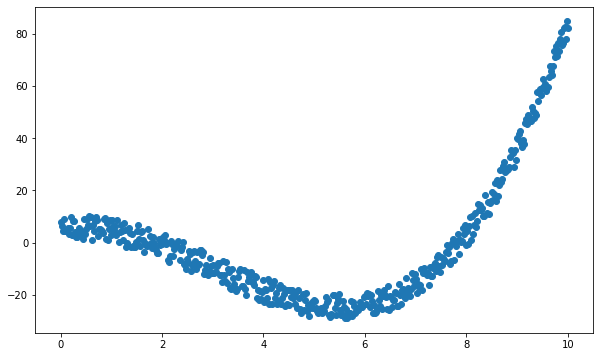

In [115]:
import numpy as np
import random
import matplotlib.pyplot as plt

x = np.linspace(0,10,500)
y = 0.45*(x**3)-4*(x**2) + 3*x + 10*np.random.rand(x.shape[0])
                
    
plt.figure(figsize=(10,6))
plt.scatter(x,y)                                             



In [130]:
#testing the method
w = np.array([weights(x[m], x, 0.05) for m in range(len(x))])

[[1.         0.92282011 0.72521737 ... 0.         0.         0.        ]
 [0.92282011 1.         0.92282011 ... 0.         0.         0.        ]
 [0.72521737 0.92282011 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.92282011 0.72521737]
 [0.         0.         0.         ... 0.92282011 1.         0.92282011]
 [0.         0.         0.         ... 0.72521737 0.92282011 1.        ]]


[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

TypeError: __init__() got an unexpected keyword argument 'figsizw'

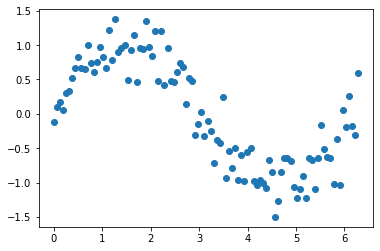

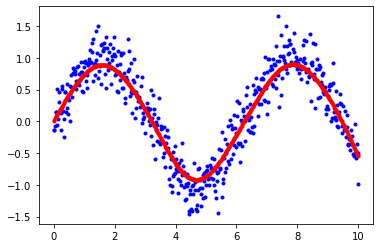

In [290]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

def weights(p, X, tau):
    m = X.shape[0]
    w= np.mat(np.eye(m))
    for i in range(m):
        w[i,i] = np.exp(-1*np.dot((X[i]-p), (X[i]-p).T)/(2*tau**2))
    
    return w
        
def predict(X, y, p, tau):
    m = X.shape[0] 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
    w = weights(np.array([p, 1]), X_, tau) 
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y))  
    pred = np.dot(np.array([p, 1]), theta) 
    return theta, pred

def plot_predictions(X, y, tau, nval):
   
    X_test = np.linspace(0, 10, nval) 
    
   # Empty list for storing predictions. 
    yest = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for p in X_test: 
        theta, yhat = predict(X, y, p, tau) 
        yest.append(yhat)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    yest = np.array(yest).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, yest, 'r.') # Predictions in red color.
    plt.show()
    
x = np.linspace(0,10,500)
#y = 0.45*(x**3)-4*(x**2) + 3*x + 10*np.random.rand(x.shape[0])
y = np.sin(x) + np.random.normal(loc = 0, scale = .25, size = 500)


plot_predictions(np.array([x]).T, np.array([y]).T, 0.5, 500)
